<a href="https://colab.research.google.com/github/ale-nunes/Data-Science-e-Machine-Learning/blob/master/Introdu%C3%A7%C3%A3o_aos_dados_geoespaciais_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Neste tutorial, você usará dados geoespaciais para traçar o caminho do furacão Florença de 30 de agosto a 18 de setembro.

#Dados espaciais, dados geoespaciais, dados GIS ou geodados, são nomes de dados numéricos que identificam a localização geográfica de um objeto físico, 
#como um prédio, uma rua, uma cidade, uma cidade, um país etc., de acordo com um sistema de coordenadas geográficas.

In [0]:
#Pandas : fornecem estruturas de dados e ferramentas de análise de dados
#Numpy : um pacote fundamental para computação científica com Python
#SciPy : (pronuncia-se “Sigh Pie”) é um ecossistema baseado em Python de software de código aberto para matemática, ciências e engenharia.
#RTree : um wrapper Python ctypes de libspatialindex que fornece vários recursos avançados de indexação espacial
#GDAL : biblioteca de tradutores para formatos de dados geoespaciais raster e vetoriais
#Fiona : Fiona lê e grava arquivos de dados espaciais
#Shapely : Objetos geométricos, predicados e operações
#GeoPandas : estende os tipos de dados usados pelos pandas para permitir operações espaciais em tipos geométricos.
#PySAL : uma biblioteca de funções de análise espacial escrita em Python, destinada a suportar o desenvolvimento de aplicações de alto nível.
#Matplotlib : biblioteca de plotagem 2D em Python
#Missingno : Módulo de visualização de dados ausente para Python

In [0]:
# required libraries

""" 
!pip install pandas
!pip install numpy
!pip install scipy
!pip install rtree
!pip install gdal
!pip install fiona
!pip install shapely
!pip install geopandas
!pip install pysal
!pip install matplotlib
!pip install missingno

""""

In [0]:
#file configuration libspatialindex for use of geopandas

In [0]:
!apt-get install -qq curl g++ make

In [0]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   447k      0  0:00:01  0:00:01 --:--:--  447k


In [0]:
import os
os.chdir('spatialindex-src-1.8.5')

In [0]:
!./configure

In [0]:
!make

In [0]:
!make install

In [0]:
!pip install rtree

In [0]:
!ldconfig

In [0]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [0]:
#upload file for colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "data_file" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_file.json to data_file (1).json
User uploaded file "data_file" with length 2552566 bytes


In [0]:
country = geopandas.read_file("data_file.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [0]:
type(country)

geopandas.geodataframe.GeoDataFrame

In [0]:
type(country.geometry)

geopandas.geoseries.GeoSeries

In [0]:
#Cada objeto pode ser usado para um tipo diferente de objeto físico, como: Ponto para construção, Linha para rua,
#Polígono para cidade e MultiPolygon para país com várias cidades internas.

type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

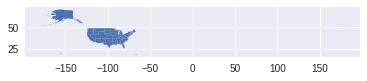

In [0]:
country.plot()

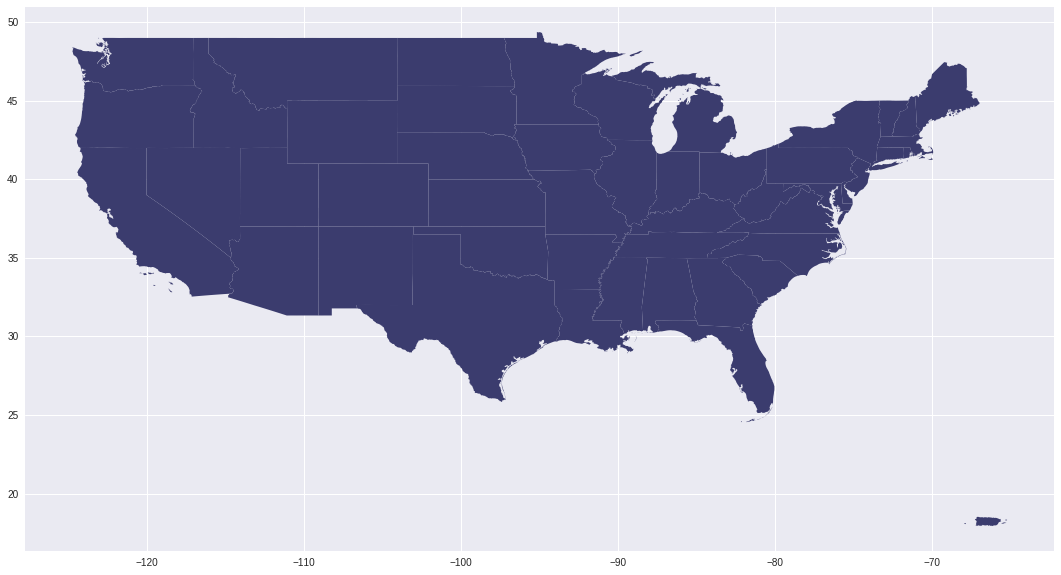

In [0]:
#Exclude Alaska and Hawaii for now
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(20,10), color='#3B3C6E');

In [0]:
#upload file for colab hurricane data

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "stormhistory" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving stormhistory.csv to stormhistory.csv
User uploaded file "stormhistory" with length 13685 bytes


In [0]:
florence = pd.read_csv("stormhistory.csv")
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


In [0]:
""""
Análise exploratória de dados
Essa é sempre a primeira coisa que você faz ao carregar qualquer conjunto de dados:

Verificando as informações, tipo de dados
Qualquer valor ausente
Dados estatísticos

""""

In [0]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
AdvisoryNumber    105 non-null object
Date              105 non-null object
Lat               105 non-null float64
Long              105 non-null float64
Wind              105 non-null int64
Pres              105 non-null int64
Movement          105 non-null object
Type              105 non-null object
Name              105 non-null object
Received          105 non-null object
Forecaster        104 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


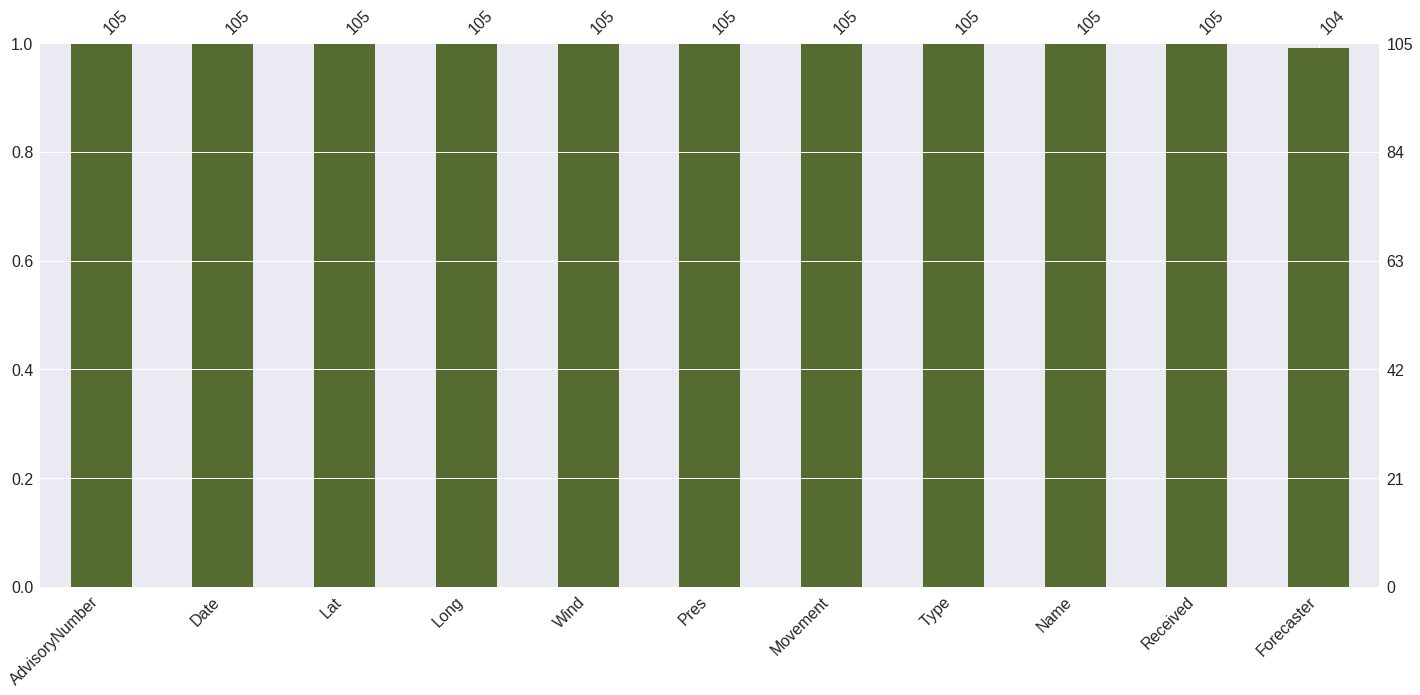

In [0]:
msn.bar(florence, color = 'darkolivegreen')

In [0]:
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


In [0]:
# dropping all unused features:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


In [0]:
# Add "-" in front of the number to correctly plot the data:
florence['Long'] = 0 - florence['Long']
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


In [0]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long','Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [0]:
 #Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [0]:
type(florence)

pandas.core.frame.DataFrame

In [0]:
type(florence['coordinates'])

pandas.core.series.Series

In [0]:
#convert count df to geodf
florence = geopandas.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [0]:
#verif data convert GeoFrame
type(florence)

geopandas.geodataframe.GeoDataFrame

In [0]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

In [0]:
florence[florence['Name']== 'Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)
5,08/31/2018 02:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-21.2 13.4)
6,08/31/2018 05:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.4 13.6)
7,08/31/2018 08:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.8 13.7)
8,08/31/2018 11:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-22.7 13.7)
9,08/31/2018 14:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-23.3 13.8)


In [0]:
# Groupping by name to see how many names it has in the data set:

florence.groupby('Name').Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

In [0]:
#finding average hurricane speed
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4),
                                                                                         florence.Wind.max()))



Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum


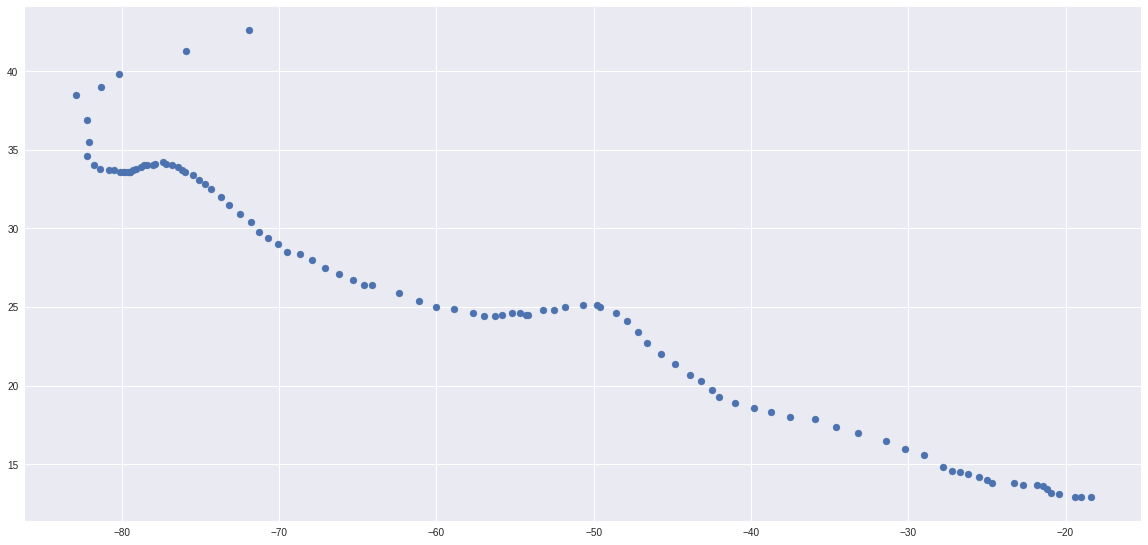

In [0]:
florence.plot(figsize=(20,10))

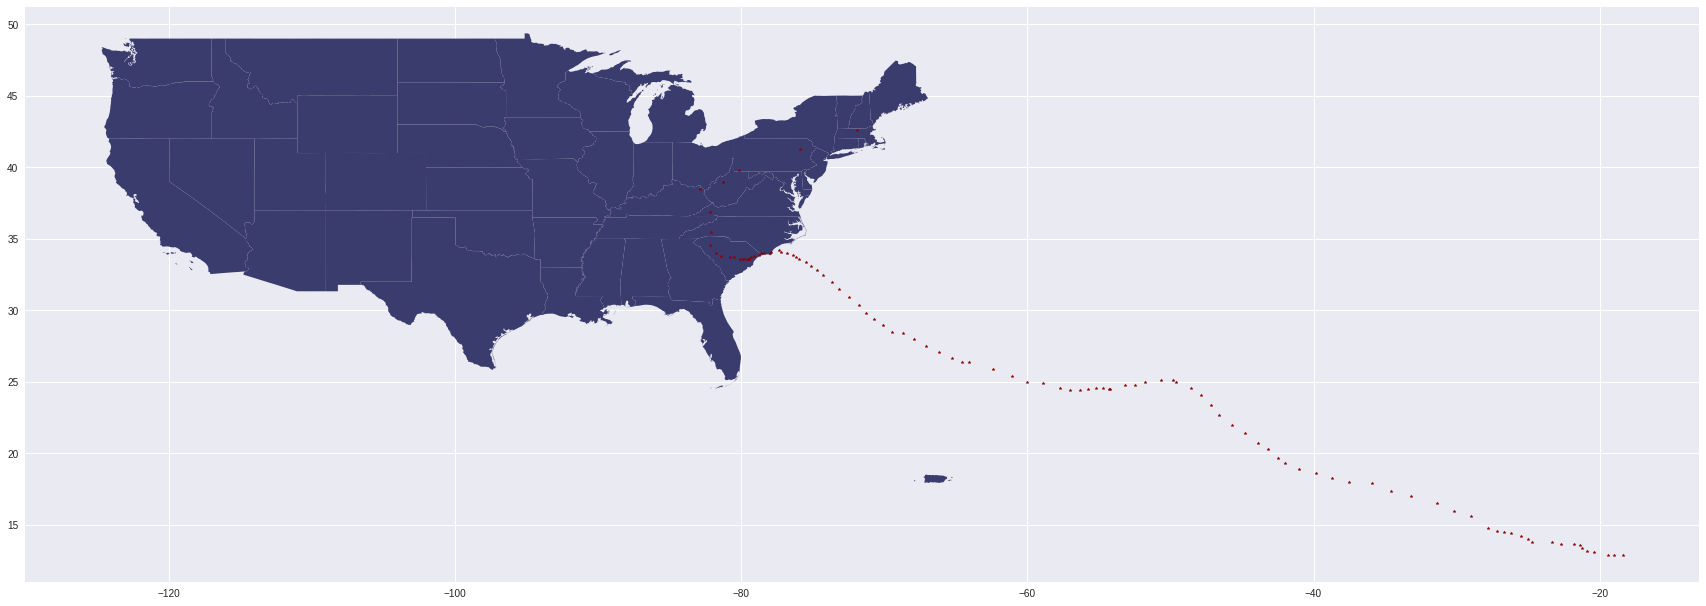

In [0]:
# Plotting to see the hurricane overlay the US map:

fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

In [0]:
#Adicionando título
#Cor da posição do furacão com base na velocidade do vento para ver o quão forte o furacão foi quando atingiu cada cidade.
#Remover eixo
#Adicionar legenda
#Salvando o resultado em um arquivo de imagem para usar posteriormente

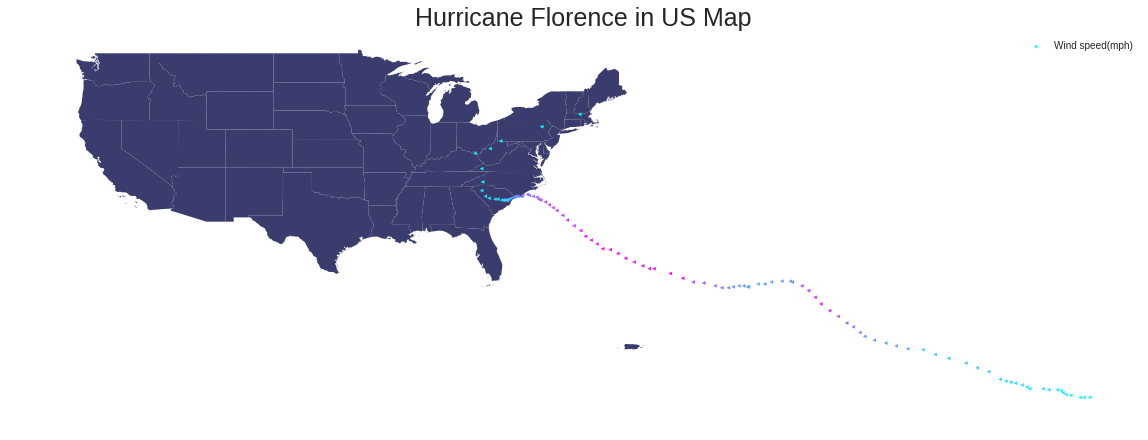

In [0]:
fig, ax = plt.subplots(1, figsize=(20,10))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
florence.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Florence in US Map", fontsize=25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');